In [2]:
import numpy as np
import pandas as pd
import glob


import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline


rc = {'axes.facecolor': '#E3DCD1',
      'font.family': 'Lucida Sans Unicode',
      'grid.linestyle': '-',
      'grid.linewidth': '0.75',
      'grid.color': '#ffffff',
      'mathtext.fontset': 'stixsans',
      'mathtext.sf': 'sans',
      'legend.frameon': True}
plt.rc('text.latex', preamble=r'\usepackage{sfmath}')
plt.rc('mathtext', fontset='stixsans', sf='sans')
sns.set_style('darkgrid', rc=rc)
sns.set_palette("colorblind", color_codes=True)
sns.set(rc=rc)


## Outline for notebook

In this notebook I'm going to organize all the requests that RP has made from me in sifting through the Schmidt et. al. and related data. Compared to more focused cell biology work that looks at a speicifc type of protein, this dataset essentially gives us everything. With the addition of many growth conditions, we have a rich set of protein copy numbers that covers biological activity ranging from transcription and translation, to more fundamental aspects of energy utilization and synthesis. Protein groups to be looked at:


- ATP synthase

- RNA polymerase and sigma factors

- DNA polymerase

- Glucose transporters

- ribosomes

In [3]:
combined_df = pd.read_csv('../../../data/combined_copynumbers_Schmidt_Li_Tanguichi.csv')
combined_df = combined_df[combined_df.dataset == 'Schmidt']
combined_df.head()

,Unnamed: 0,Annotated functional COG class,Annotated functional COG group (description),Annotated functional COG groups (letter),Gene,condition,copy_number,copy_number_stdev,dataset,growth_rate,type
0,0,INFORMATION STORAGE AND PROCESSING,"Translation, ribosomal structure and biogenesis",J,rplA,Glucose,28502.0,4514.7168,Schmidt,0.58,ribosomal
1,1,INFORMATION STORAGE AND PROCESSING,"Translation, ribosomal structure and biogenesis",J,rplA,LB,76877.0,1614.4170,Schmidt,1.90,ribosomal
2,2,INFORMATION STORAGE AND PROCESSING,"Translation, ribosomal structure and biogenesis",J,rplA,Glycerol + AA,47366.0,587.3384,Schmidt,1.27,ribosomal
3,3,INFORMATION STORAGE AND PROCESSING,"Translation, ribosomal structure and biogenesis",J,rplA,Acetate,11672.0,466.8800,Schmidt,0.30,ribosomal
4,4,INFORMATION STORAGE AND PROCESSING,"Translation, ribosomal structure and biogenesis",J,rplA,Fumarate,17445.0,439.6140,Schmidt,0.42,ribosomal


## ATP synthase

### ATP Synthase consists of two subunits, an F0 subunit and an F1. 

#### ATP synthase F0 complex = ([AtpE]10)([AtpF]2)(AtpB) 


a : AtpB 

b : (AtpF)2

c : (AtpE)10 


#### ATP synthase F1 complex = (AtpC)(AtpH)([AtpA]3)(AtpG)([AtpD]3) (summary available) 

α : (AtpA)3

β: (AtpD)3

γ : AtpG 

δ : AtpH 
 
ε : AtpC


In [35]:
subunit_dict = {
 'atpB' : 1,
 'atpF' : 2,             
 'atpE' : 10,
 'atpA': 3,
 'atpD' : 3,
 'atpG' : 1,
 'atpH' : 1,
 'atpC' : 1}

subunit_dict_char = {
 'atpB' : 'a',
 'atpF' : 'b',             
 'atpE' : 'c',
 'atpA': 'α',
 'atpD' : 'β',
 'atpG' : 'γ',
 'atpH' : 'δ',
 'atpC' : 'ε'}

dict_values(['a', 'b', 'c', 'α', 'β', 'γ', 'δ', 'ε'])

In [4]:
atpsyn_df = pd.read_csv('../../../data/schmidt2016_atp_synth_subunits.csv')
combined_df_atp = combined_df[combined_df.Gene.isin(atpsyn_df.gene.unique())]

In [78]:
atpsyn_df

,Subunit,gene,glucose,lb_miller,glycerol_pAA,acetate,fumarate,glucosamine,glycerol,pyruvate,...,stationary_1day,stationary_3day,osmotic_stress_glucose_cv,42C,pH6,xylose,mannose,galactose,succinate,fructose
0,α,atpA,14552,23968,33172.0,11045,16436,18991,17975,19369,...,5415,5207,11021,13294,11071,16490.0,17105.0,11769,20018,19100.0
1,a,atpB,1155,1881,2490.0,770,1867,1355,2109,3159,...,689,476,1186,2110,1371,2339.0,2386.0,1581,2903,3191.0
2,ε,atpC,10112,15370,21432.0,7138,11551,11472,12009,12894,...,3439,4340,8136,9940,6690,10339.0,11267.0,7045,11302,12777.0
3,β,atpD,24156,42417,48805.0,16016,23707,25159,26449,30533,...,7040,6955,13916,16817,13132,23770.0,24279.0,14507,25885,24016.0
4,c,atpE,286,565,519.0,145,249,361,376,371,...,263,228,321,221,309,323.0,321.0,189,306,351.0
5,b,atpF,8988,13934,18264.0,5495,9735,9147,9956,11267,...,5133,4762,8709,8456,6360,9156.0,8575.0,5249,8841,9158.0
6,γ,atpG,2307,3812,4604.0,1640,2288,2261,2414,2779,...,849,792,1172,1472,1086,2089.0,2141.0,1553,2212,2250.0
7,δ,atpH,7700,11886,16092.0,5679,7452,8325,7941,9233,...,2980,3028,6415,6263,5603,7979.0,7303.0,5276,8236,8789.0


True

3 3
3 4
1 5
1 6
1 7


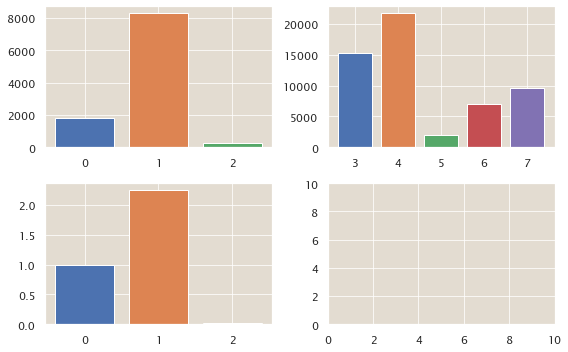

In [110]:
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2,2,figsize=(8,5))

count = 0
for gene in subunit_dict.keys():
    data = combined_df_atp[combined_df_atp.Gene == gene]
    
    
    if np.any(data.Gene.unique() ==['atpB', 'atpF', 'atpE']):
        ax1.bar(count, data.copy_number.mean())
        
        ax3.bar(count, data.copy_number.mean()/ \
                (combined_df_atp[combined_df_atp.Gene == 'atpB'].copy_number.mean()*subunit_dict[gene]))
        
    else:
        ax2.bar(count, data.copy_number.mean())  
#         ax4.bar(count, data.copy_number.mean()/ \
#                 (combined_df_atp[combined_df_atp.Gene == 'atpG'].copy_number.mean()*subunit_dict[gene]))  
        kwargs={'zorder':100, 'linewidth':5}
        print(subunit_dict[gene], count)
        ax4.axhline(y=subunit_dict[gene], xmin = count - 1, xmax = count + 1, alpha = 1, color='r', **kwargs)
#         ax4.axhline(y=1, xmin = 0,xmax=10)
    count += 1
    
ax4.set_ylim(0,10)
ax4.set_xlim(0,10)
# for ax in [ax1,ax2]:    
#     ax.set_xlabel('growth condition', fontsize=14)
    
#     if ax == ax1:
#         ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

#     ax.tick_params(axis='both', which='major', labelsize=14)
#     ax.grid(False)
#     ax.tick_params(which='major', width=0.5)
#     ax.tick_params(which='major', length=14)

#     ax.get_yaxis().set_tick_params(which='both', direction='in') 
#     ax.tick_params(axis='y', colors='white', labelcolor='k')

#     ax.set_xticks(np.arange(len(subunit_dict_char.values())))
#     ax.set_xticklabels(subunit_dict_char.values(), rotation = 45, ha="right",  position=(1,0.08))


plt.tight_layout()

In [101]:
subunit_dict[gene]

1

In [52]:
subunit_dict_char.values()[:]

TypeError: 'dict_values' object is not subscriptable

In [ ]:
genes_list = [['rpoA', 'rpoB', 'rpoC'],
             ['rpoD', 'rpoN', 'rpoH', 'rpoS', 'fliA', 'fecI', 'rpoE'],
             ['dnaE', 'dnaQ', 'holE', 'dnaX', 'holB', 'holA', 'dnaN', 'holC', 'holD'],
             ['ptsG', 'ptsI', 'ptsH', 'crr', 'manZ', 'manX', 'manY'],
             ['fabB', 'fabF', 'fabH'],
             ['rpsA', 'rpsB', 'rpsC', 'rpsD', 'rpsE',
              'rpsF', 'rpsG', 'rpsH', 'rpsI', 'rpsJ', 'rpsK', 
              'rpsL', 'rpsM', 'rpsN', 'rpsO', 'rpsP', 'rpsQ', 
              'rpsR', 'rpsS', 'rpsT', 'rpsU', 'sra'],
             ['rplA', 'rplB', 'rplC', 'rplD', 'rplE', 'rplF', 'rplJ',
             'rplL', 'rplI', 'rplK', 'rplM', 'rplN', 'rplO', 'rplP', 'rplQ', 
              'rplR', 'rplS','rplT', 'rplU', 'rplV', 'rplW', 'rplX', 'rplY', 
              'rpmA', 'rpmB', 'rpmC', 'rpmD', 'rpmE', 'rpmF', 'rpmG', 'rpmH', 
              'rpmI', 'rpmJ']]

gene_list_labels=['RNA polymerase',
                 'sigma factors',
                 'DNA polymerase III',
                 'glucose transporters related',
                 'fatty acid syntases',
                 '30S ribosomal subunit',
                 '50S ribosomal subunit']